## 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install koreanize-matplotlib
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 20.3 MB/s eta 0:00:00


## 데이터 로드

In [86]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [87]:
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

In [88]:
# 주문 취소 건 제외
df = df[df["UnitPrice"] > 0].copy()
df = df[df["Quantity"] > 0].copy()

In [89]:
# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [90]:
# 데이터 타입 변경

df["Country"] = df["Country"].astype(str)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     530104 non-null  category      
 1   StockCode     530104 non-null  category      
 2   Description   530104 non-null  category      
 3   Quantity      530104 non-null  int32         
 4   InvoiceDate   530104 non-null  datetime64[ns]
 5   UnitPrice     530104 non-null  float64       
 6   CustomerID    397884 non-null  float32       
 7   Country       530104 non-null  object        
 8   InvoiceMonth  530104 non-null  int64         
 9   TotalPrice    530104 non-null  float64       
dtypes: category(3), datetime64[ns](1), float32(1), float64(2), int32(1), int64(1), object(1)
memory usage: 32.9+ MB



## 미션1) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
다음 국가에 대해 상관계수를 구하고 seaborn 의 lmplot을 사용하여 시각화 하고 심슨의 역설을 설명할 수 있는지 분석해 주세요.
또, 이를 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```


* 슬라이드 자료에서 "심슨의 역설"을 찾아주세요.

In [13]:
df['Country'].value_counts(1).head()

United Kingdom    0.915147
Germany           0.017053
France            0.015859
EIRE              0.014884
Spain             0.004686
Name: Country, dtype: float64

In [19]:
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
df_sub = df[df['Country'].isin(country_group)]
df_sub

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
9783,537218,85016,SET OF 6 VINTAGE NOTELETS KIT,6,2010-12-05 15:46:00,2.55,12763.0,Japan,12,15.30
9784,537218,21506,"FANCY FONT BIRTHDAY CARD,",12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9785,537218,22716,CARD CIRCUS PARADE,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9786,537218,22983,CARD BILLBOARD FONT,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
9787,537218,22030,SWALLOWS GREETING CARD,12,2010-12-05 15:46:00,0.42,12763.0,Japan,12,5.04
...,...,...,...,...,...,...,...,...,...,...
524432,580553,20675,BLUE POLKADOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524433,580553,20676,RED RETROSPOT BOWL,16,2011-12-05 10:14:00,1.25,12646.0,USA,12,20.00
524434,580553,20975,12 PENCILS SMALL TUBE RED RETROSPOT,72,2011-12-05 10:14:00,0.65,12646.0,USA,12,46.80
524435,580553,22083,PAPER CHAIN KIT RETROSPOT,12,2011-12-05 10:14:00,2.95,12646.0,USA,12,35.40


In [32]:
# Drop Outlier

data = df_sub['TotalPrice']

# Calculate the IQR (Interquartile Range)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_sub_filtered = df_sub[(data >= lower_bound) & (data <= upper_bound)]


In [35]:
df_sub_filtered.groupby('Country')[['UnitPrice', 'TotalPrice']].corr()

UnitPrice  TotalPrice
Country                                    
Canada    UnitPrice    1.000000    0.182387
          TotalPrice   0.182387    1.000000
Hong Kong UnitPrice    1.000000    0.453375
          TotalPrice   0.453375    1.000000
Japan     UnitPrice    1.000000    0.317862
          TotalPrice   0.317862    1.000000
Lebanon   UnitPrice    1.000000    0.684952
          TotalPrice   0.684952    1.000000
Singapore UnitPrice    1.000000    0.272893
          TotalPrice   0.272893    1.000000
USA       UnitPrice    1.000000    0.253409
          TotalPrice   0.253409    1.000000

In [37]:
corr = df_sub.corr(numeric_only=True)
corr

,Quantity,UnitPrice,CustomerID,InvoiceMonth,TotalPrice
Quantity,1.000000,-0.028779,-0.078736,0.035014,0.530920
UnitPrice,-0.028779,1.000000,-0.023764,0.011944,0.750603
CustomerID,-0.078736,-0.023764,1.000000,-0.017716,-0.078272
InvoiceMonth,0.035014,0.011944,-0.017716,1.000000,0.046709
TotalPrice,0.530920,0.750603,-0.078272,0.046709,1.000000


In [39]:
ones = np.ones_like(corr)
np.triu(ones)

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

<Axes: >

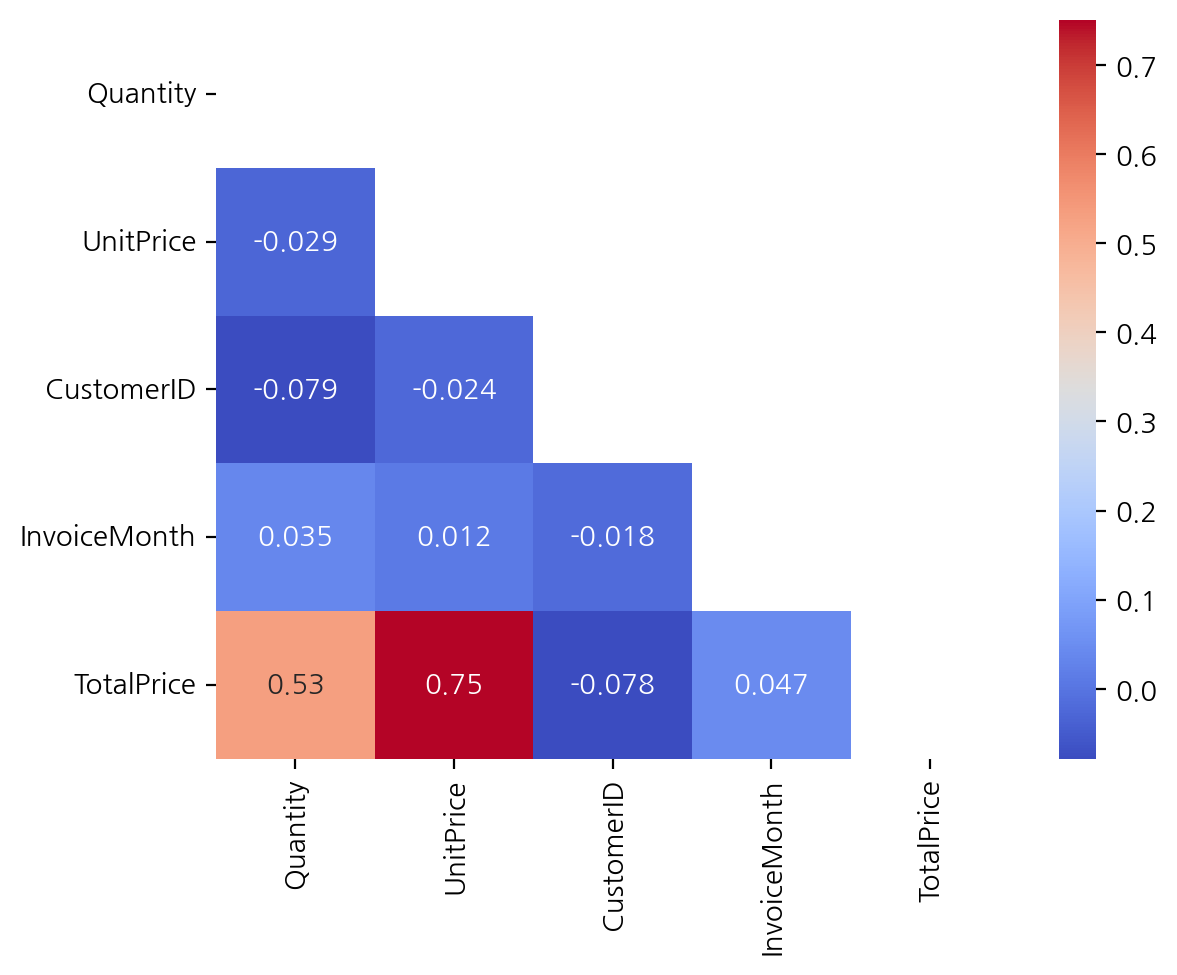

In [42]:
sns.heatmap(data=corr, annot=True, mask=np.triu(ones), cmap='coolwarm')

In [46]:
df_sub.drop('CustomerID', axis = 1, inplace=True)

<ipython-input-46-9f5657b890c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.drop('CustomerID', axis = 1, inplace=True)


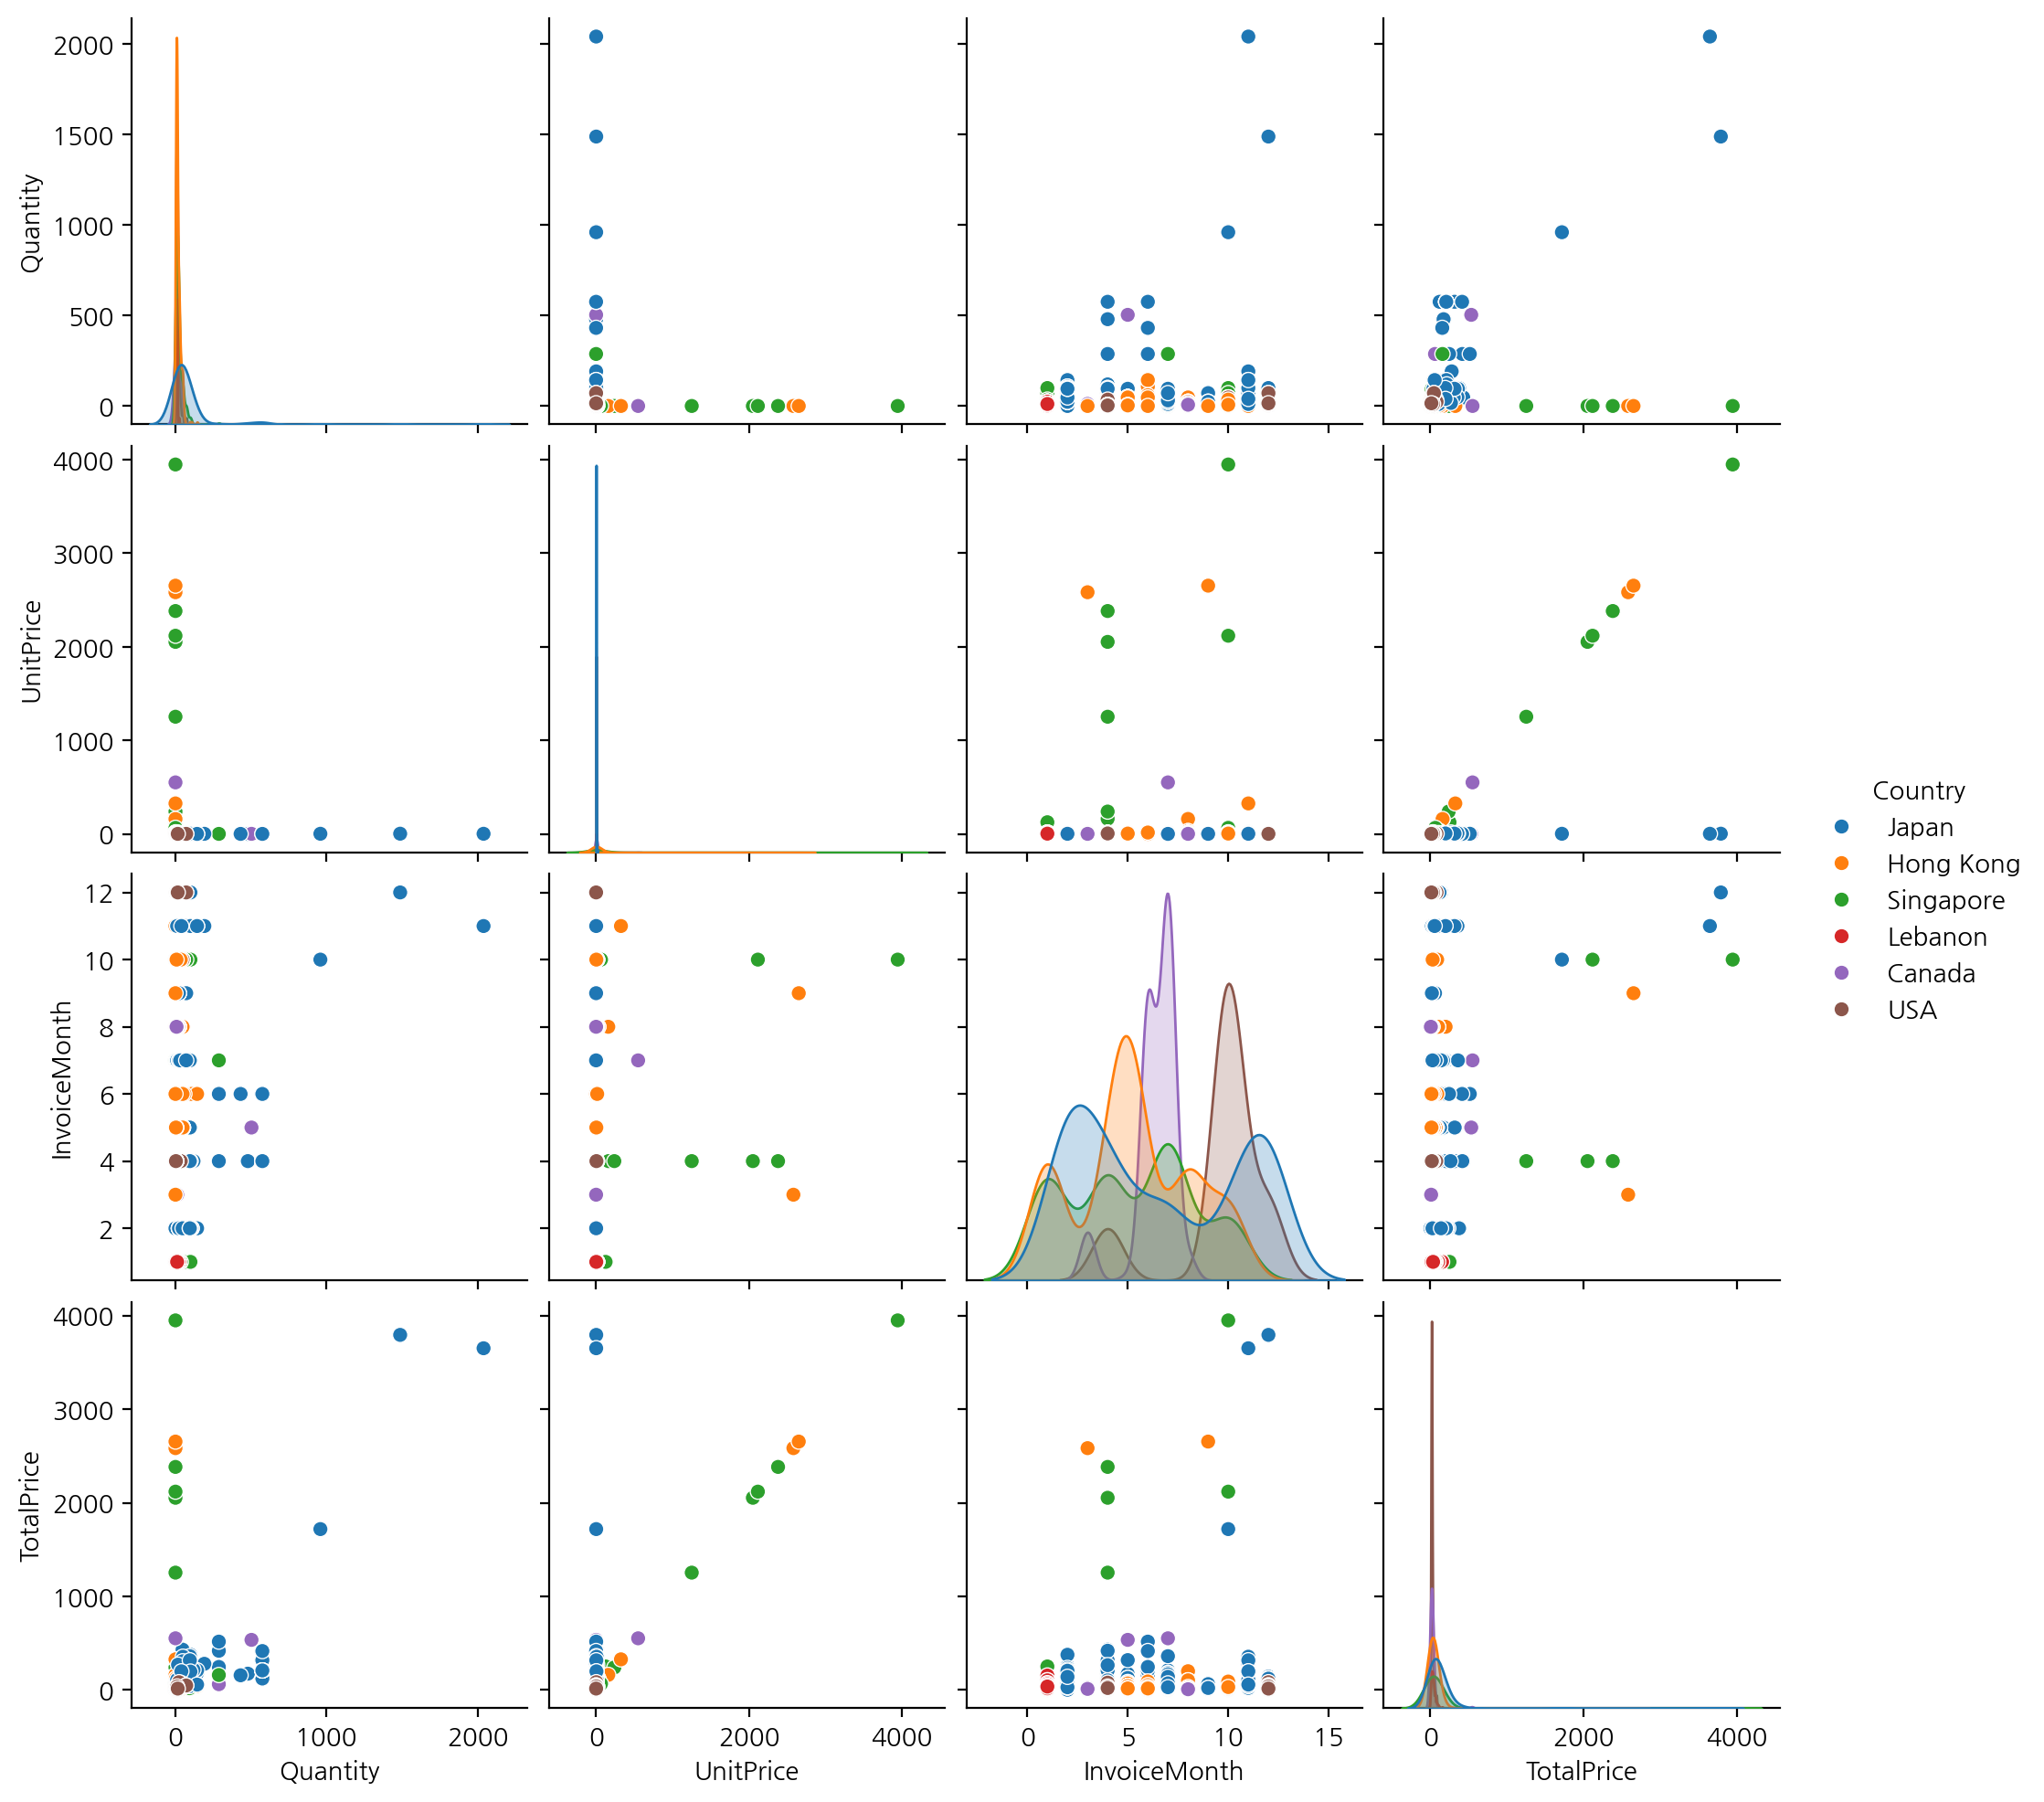

In [49]:
sns.pairplot(data=df_sub, hue='Country')

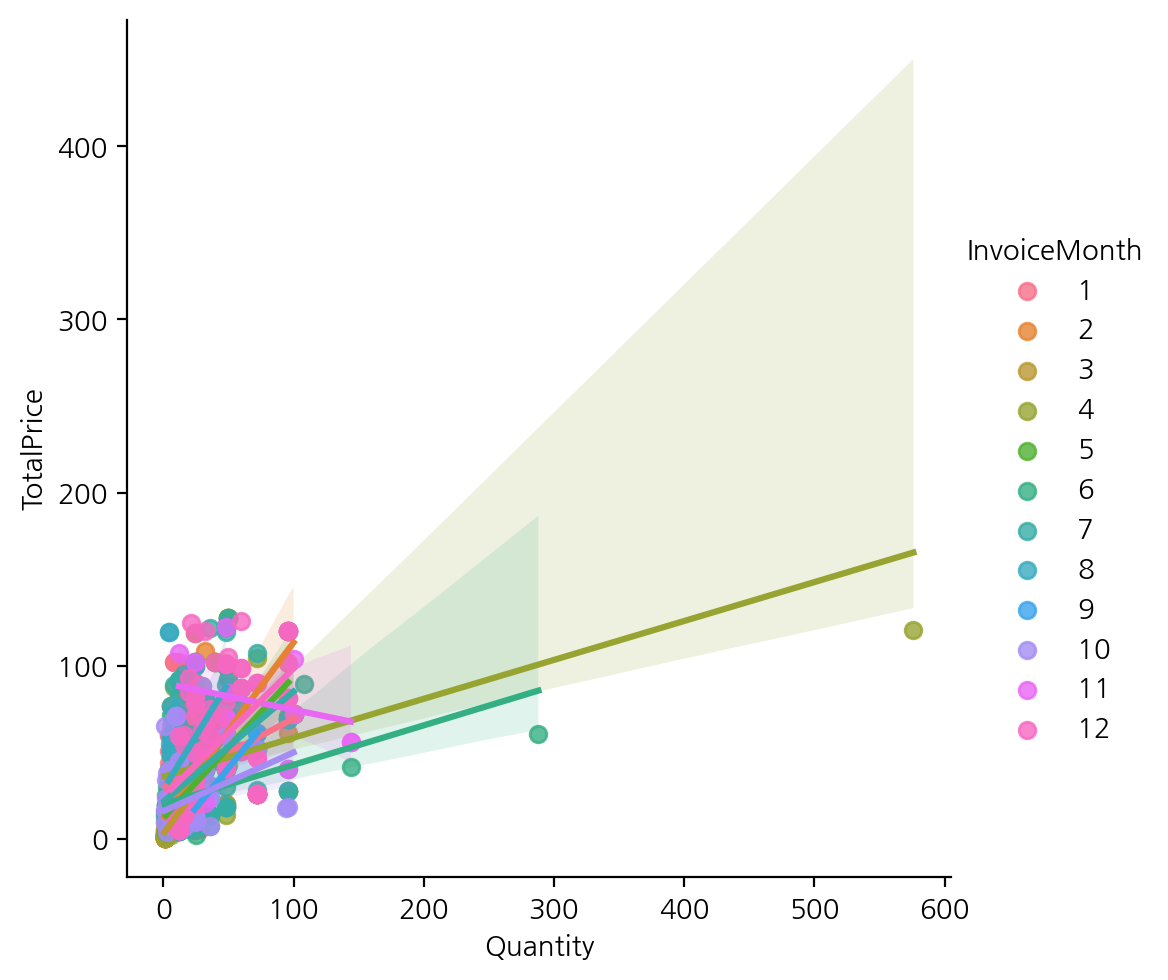

In [33]:
sns.lmplot(data=df_sub_filtered, x='Quantity', y='TotalPrice', hue='InvoiceMonth')

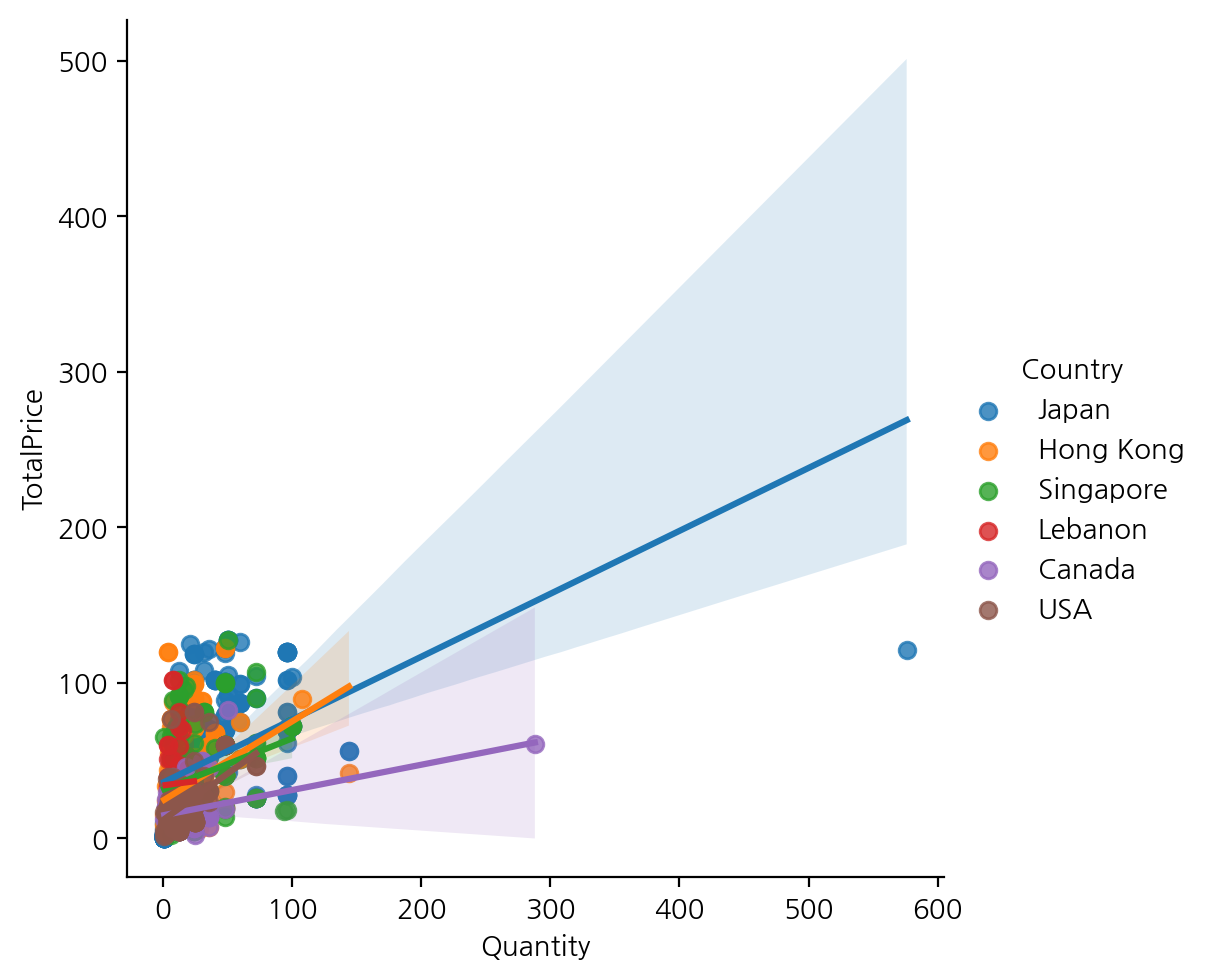

In [34]:
sns.lmplot(data=df_sub_filtered, x='Quantity', y='TotalPrice', hue='Country')

# 미션1 답변
- 심슨의 역설은 찾지 못했습니다만, 국가별로 양상이 다르게 나타난다는 것은 확인했습니다
- 비즈니스 활용 방법: 지역별 재고 최적화, 크리스마스 프로모션을 어떻게 하느냐를 다르게 둘 수 있습니다

## 미션2) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalSales)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [91]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 데이터 전처리
# 결측치 제거 또는 대체
df = df.dropna(subset=['UnitPrice', 'TotalPrice'])

# 단순 회귀분석
# 독립변수: UnitPrice, 종속변수: TotalPrice
X = df['UnitPrice']
y = df['TotalPrice']
X = sm.add_constant(X) # 상수항 추가

In [53]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((424083, 2), (106021, 2), (424083,), (106021,))

In [56]:
X_train_ols = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_ols).fit()
print(model_ols)

In [60]:
sm.OLS?

In [57]:
X_test_ols = sm.add_constant(X_test)
y_pred_ols = model_ols.predict(X_test_ols)
y_pred_ols

269788    24.212274
83138     20.520040
538681    20.420250
58905     16.927596
388858    17.127176
            ...    
279914    17.905539
358066    22.056808
35752     28.124046
228802    20.420250
86509     19.222769
Length: 106021, dtype: float64

<Axes: xlabel='TotalPrice'>

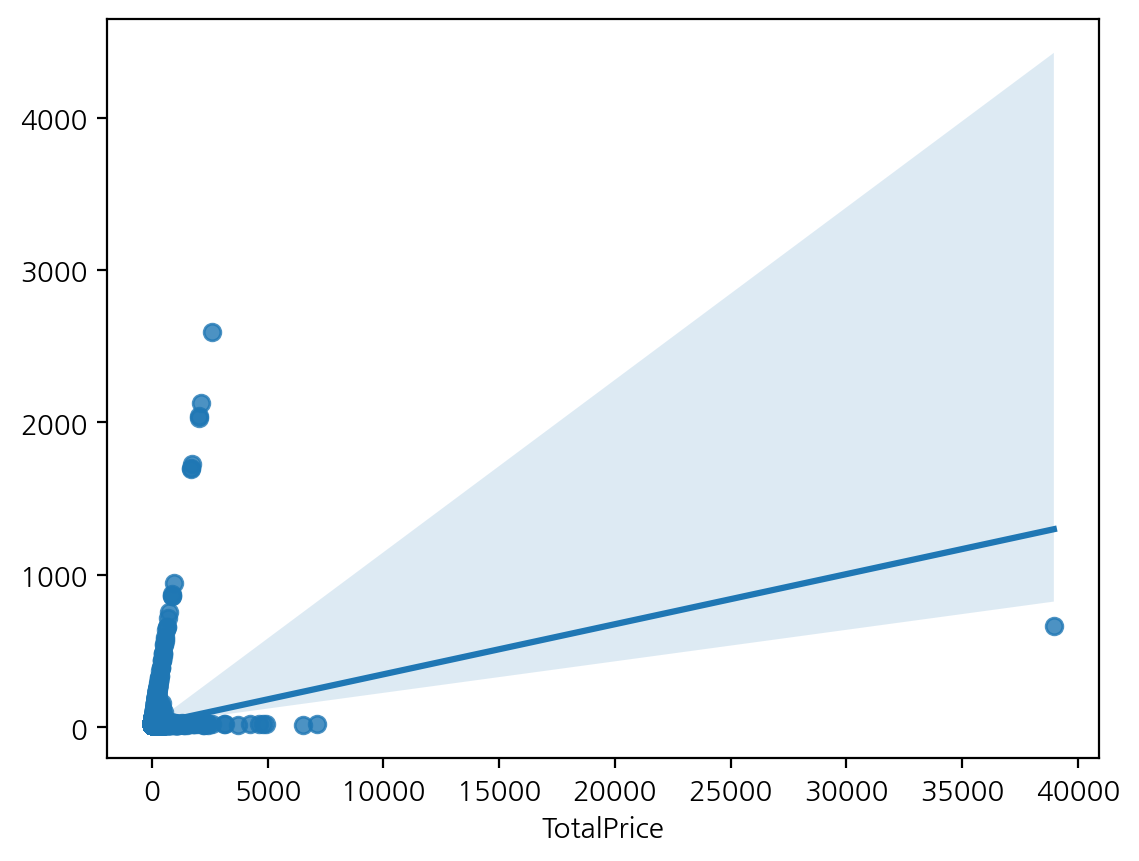

In [58]:
sns.regplot(x=y_test, y=y_pred_ols)

In [59]:
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     7507.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:18:35   Log-Likelihood:            -3.0085e+06
No. Observations:              424083   AIC:                         6.017e+06
Df Residuals:                  424081   BIC:                         6.017e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.2790      0.450     36.173      0.0

In [64]:
# sm.OLS docs 보고 따라하기
>>> import statsmodels.api as sm
>>> import numpy as np
>>> y2 = df['TotalPrice']
>>> X2 = df['UnitPrice']
>>> X2 = sm.add_constant(X2)
>>> model = sm.OLS(y2,X2)
>>> results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalPrice   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 02 Feb 2024   Prob (F-statistic):               0.00
Time:                        02:31:31   Log-Likelihood:            -3.7156e+06
No. Observations:              530104   AIC:                         7.431e+06
Df Residuals:                  530102   BIC:                         7.431e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.0802      0.370     43.463      0.0

In [ ]:
# 미션2 답변
- R 제곱 값이 0.017로, 해당 모델은 설명력이 거의 없습니다
- p value 가 0이기 때문에, UnitPrice 가 TotalPrice 를 설명하는 강력한 변수인 것은 맞습니다
- 회귀 계수 (coefficient) 는 0.9979로, UnitPrice 가 1 오를 때 TotalPrice 는 0.99 오릅니다
- 추가) train-test 나누지 않고 다시 해봤는데, 여전히 R 제곱 값이 0.019로 설명력이 떨어집니다.

## 미션3) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

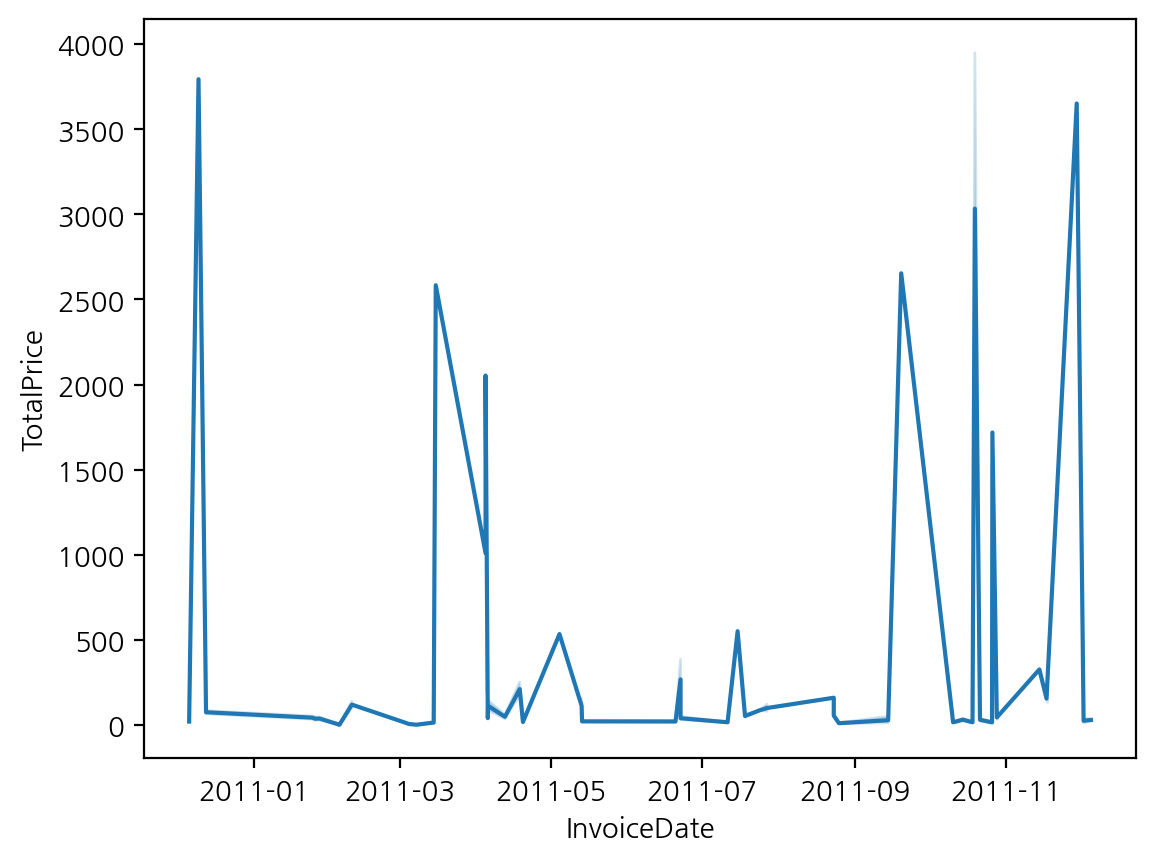

In [108]:
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=df_sub)

<Axes: xlabel='InvoiceDate', ylabel='TotalPrice'>

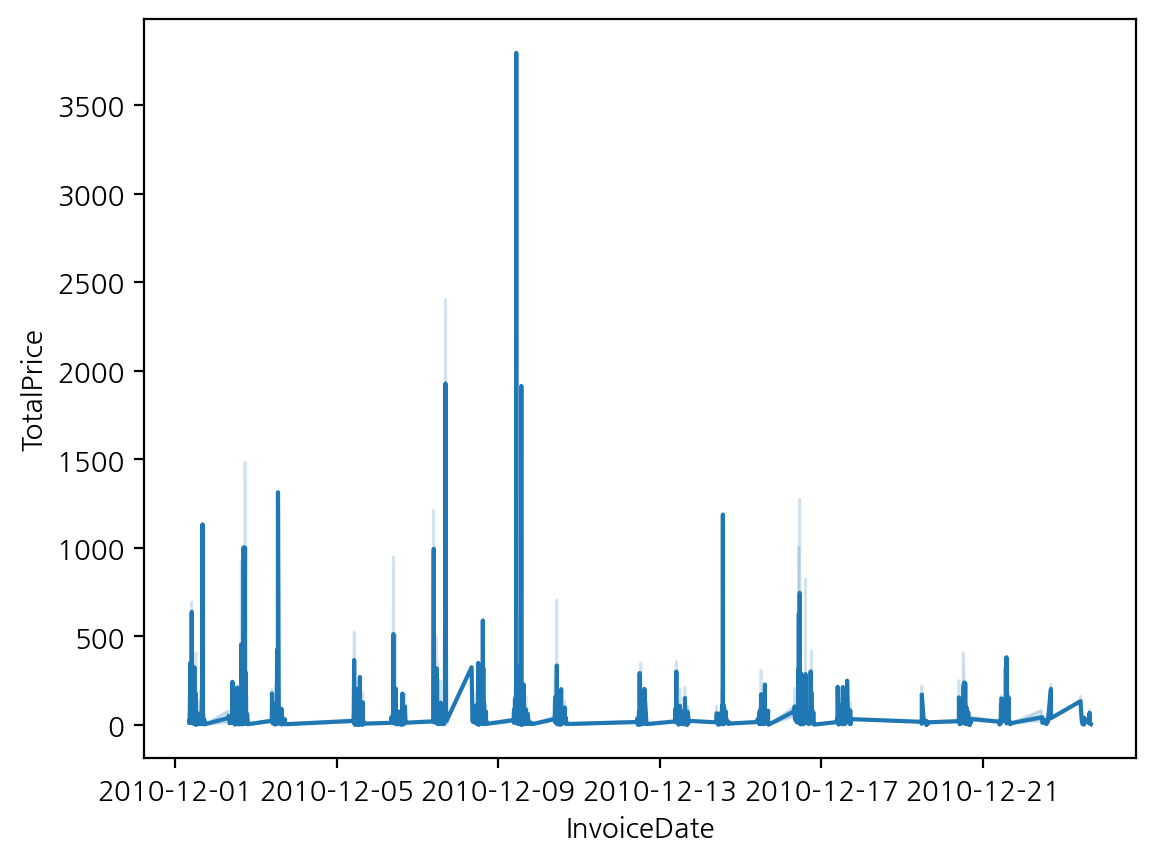

In [109]:
sns.lineplot(x='InvoiceDate', y='TotalPrice', data=df_promotion)

In [81]:
df['InvoiceDate'].describe()

<ipython-input-81-eb448c29fc46>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['InvoiceDate'].describe()


count                  530104
unique                  18499
top       2011-10-31 14:41:00
freq                     1114
first     2010-12-01 08:26:00
last      2011-12-09 12:50:00
Name: InvoiceDate, dtype: object

In [80]:
df_promotion['InvoiceDate'].tail()

42448   2010-12-23 16:06:00
42449   2010-12-23 16:06:00
42450   2010-12-23 16:06:00
42451   2010-12-23 16:06:00
42452   2010-12-23 16:06:00
Name: InvoiceDate, dtype: datetime64[ns]

## Note
- 2010년 데이터는 12/01-12/23 일 데이터밖에 없습니다
- 2011년 데이터는 12/09가 마지막입니다
- 따라서 여기서는 2010년 데이터를 사용, 크리스마스 시즌은 `12/10-12/23` 으로 하겠습니다

In [113]:
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion['InvoiceDate'] = df['InvoiceDate']
df_promotion["IsChristmasPeriod"] = df_promotion["InvoiceDate"] >= "2010-12-10"
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [114]:
df_promotion['IsChristmasPeriod'].value_counts(1)

False    0.554498
True     0.445502
Name: IsChristmasPeriod, dtype: float64

In [115]:
df_promotion['IsChristmasProduct'].value_counts(1)

False    0.938793
True     0.061207
Name: IsChristmasProduct, dtype: float64

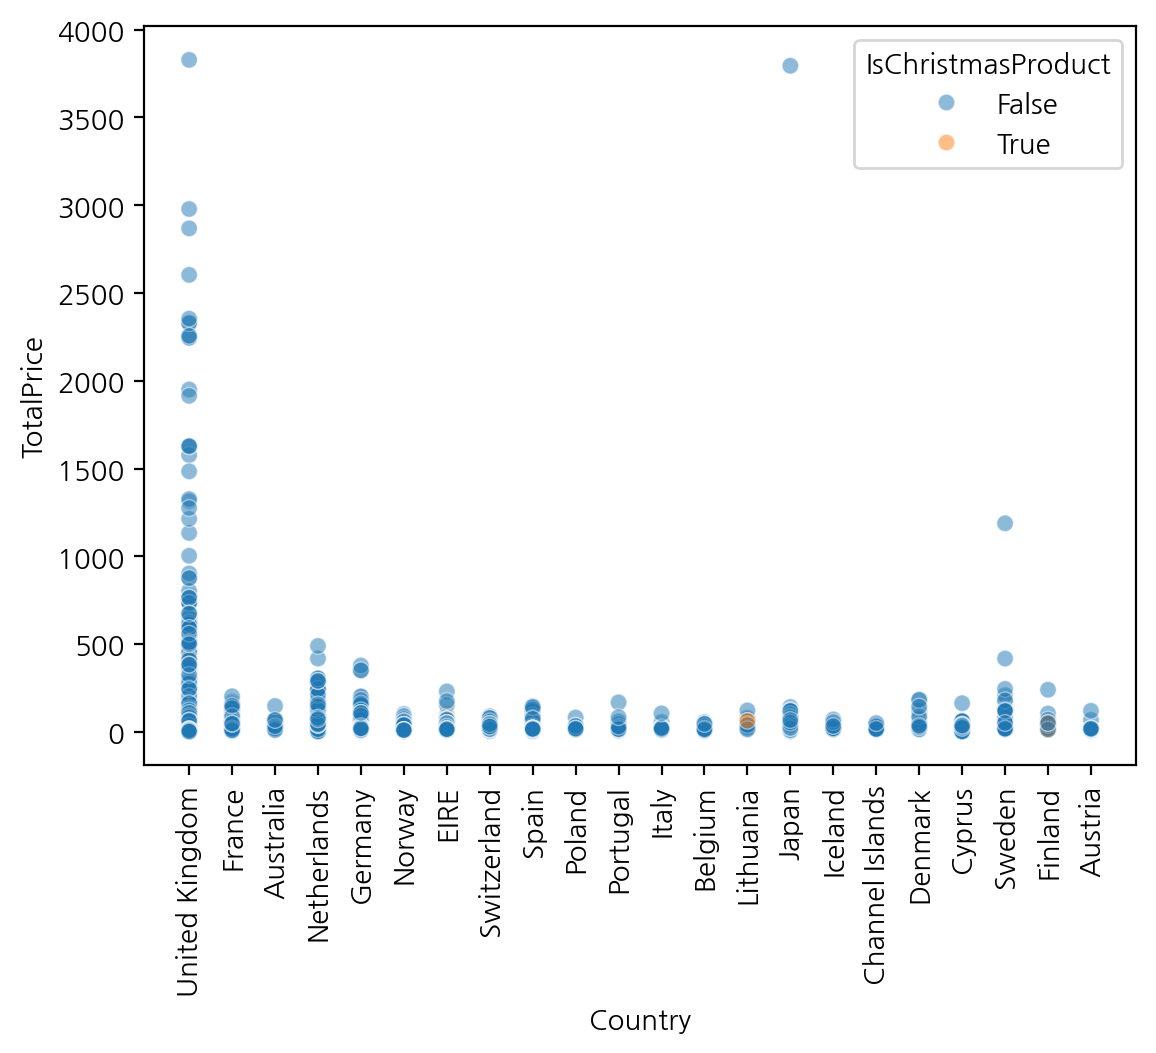

In [121]:
# 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별

sns.scatterplot(data=df_promotion, x='Country', y='TotalPrice', hue='IsChristmasProduct', alpha=0.5)
plt.xticks(rotation=90);

In [134]:
xmas_product = df_promotion[df_promotion['IsChristmasProduct'] == 1]
xmas_product.groupby('Country').count()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceMonth,TotalPrice,IsChristmasPeriod,IsChristmasProduct
Country,,,,,,,,,,,
Australia,1,1,1,1,1,1,1,1,1,1,1
Cyprus,1,1,1,1,1,1,1,1,1,1,1
EIRE,27,27,27,27,27,27,27,27,27,27,27
Finland,2,2,2,2,2,2,2,2,2,2,2
France,11,11,11,11,11,11,11,11,11,11,11
Germany,22,22,22,22,22,22,22,22,22,22,22
Japan,1,1,1,1,1,1,1,1,1,1,1
Lithuania,2,2,2,2,2,2,2,2,2,2,2
Spain,8,8,8,8,8,8,8,8,8,8,8


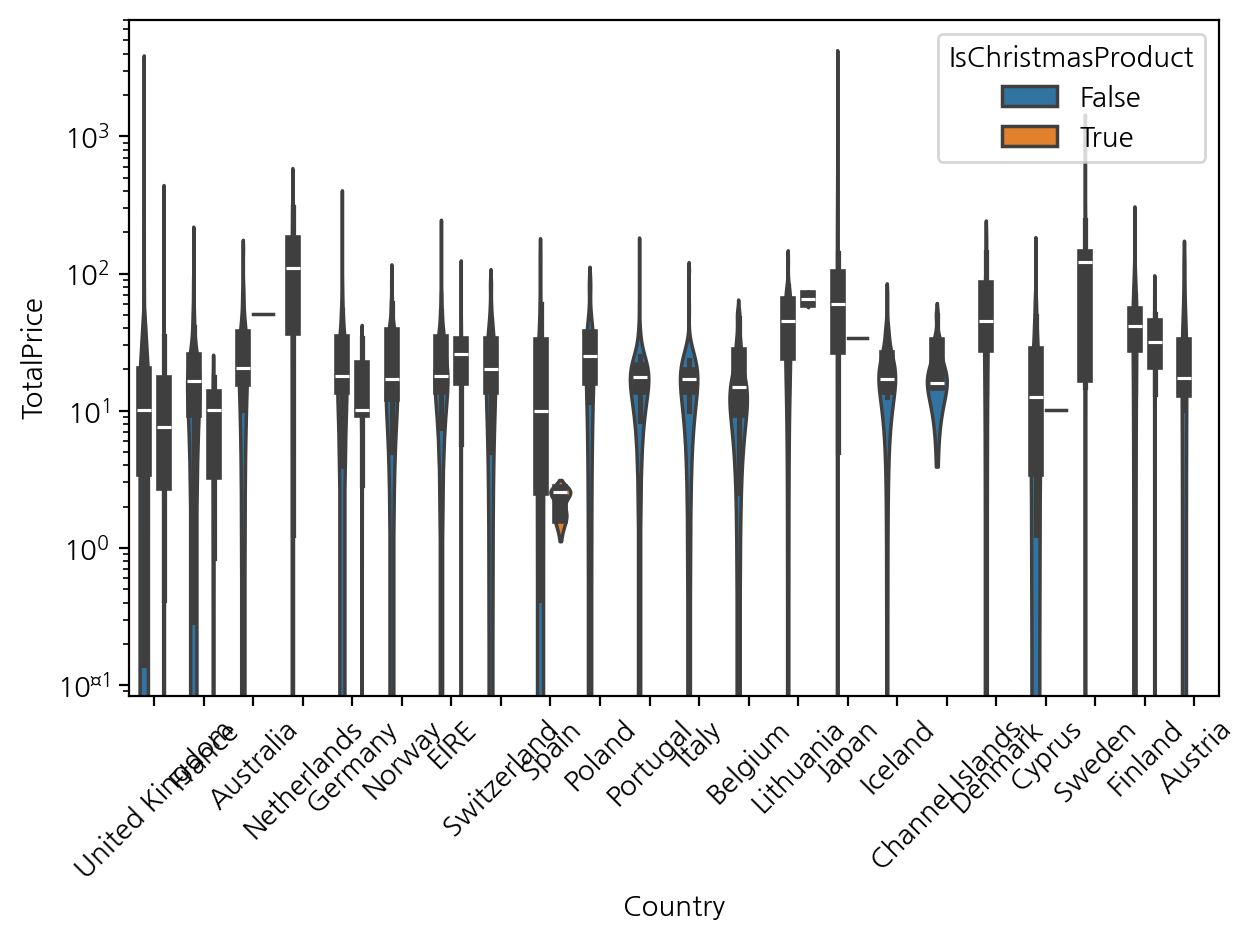

In [139]:
sns.violinplot(data=df_promotion, x='Country', y='TotalPrice', hue='IsChristmasProduct')
plt.yscale('log')

plt.xticks(rotation=45)  # Rotate the x labels to prevent overlap
plt.tight_layout()  # Adjust layout
plt.show();


## 미션4) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.



In [143]:
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [151]:
# 다변량 회귀분석
df["IsChristmasProduct"] = df["Description"].str.lower().str.contains("christmas")
X = df[['IsChristmasProduct', 'UnitPrice', 'Country']]
y = df['Quantity']

X.head()

,IsChristmasProduct,UnitPrice,Country
0,False,2.55,United Kingdom
1,False,3.39,United Kingdom
2,False,2.75,United Kingdom
3,False,3.39,United Kingdom
4,False,3.39,United Kingdom


In [152]:
scaler = StandardScaler()
X = pd.get_dummies(X)
X_scaled = scaler.fit_transform(X)

In [153]:
# 훈련 및 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
import numpy as np
import statsmodels.api as sm

X_train_ols = sm.add_constant(np.asarray(X_train))
model_ols = sm.OLS(np.asarray(y_train), X_train_ols).fit()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

## 미션5) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = df.dropna()
df = df[df['Description'].str.contains("T-LIGHT HOLDER")]
# 'WHITE HANGING HEART T-LIGHT HOLDER' 상품 구매 여부를 나타내는 타겟 변수 생성
df['Target'] = df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER'
df["Target"].value_counts()

False    6720
True     2028
Name: Target, dtype: int64

In [84]:
# 특성과 타겟 변수 분리
X = pd.get_dummies(df[['UnitPrice', 'Quantity', 'CustomerID', 'Country']])
y = df['Target']
